In [1]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np

from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.analysis_tools import Weights, PackedSelection

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)


In [7]:
from analysis.Tools.HyperPoly import HyperPoly

In [8]:
from analysis.Tools.reweighting import get_coordinates, get_coordinates_and_ref

get_coordinates_and_ref('excl_topW.root', is2D=True)

([(0.0, 0.0), (3.0, 0.0), (6.0, 0.0), (0.0, 3.0), (0.0, 6.0), (3.0, 3.0)],
 [0.0, 0.0])

In [ ]:
cpt = np.arange(-40,41,1)
cpt;

## ttH

In [9]:
coordinates = [
    (0., 0.),
    (20., 0.),
    (40., 0.),
    (0., 20.),
    (0., 40.),
    (20., 20.),
]

ref_coordinates = [0., 0.]

ttH_hp = HyperPoly(2)
ttH_hp.initialize( coordinates, ref_coordinates )

ttH_xsecs_SMEFT_LO = np.array([1.034, 1.25, 1.913, 1.291, 2.053, 1.338])

ttH_coeff = ttH_hp.get_parametrization(ttH_xsecs_SMEFT_LO/ttH_xsecs_SMEFT_LO[0])

ttH_hp.eval(ttH_coeff, [20,20])


1.2940038684719468

In [19]:
ttH_hp.eval(ttH_coeff, [7,7])

1.0353554158607043

In [14]:
ttH_hp.root_func_string(ttH_coeff)

'-0.000363*x0+0.000218*x1+0.00054*x0**2-0.000409*x0*x1+0.00061*x1**2'

In [21]:
def ttH_scalePolyLO(xt, xQM):
    return 1 - 0.000363*xt + 0.000218*xQM + 0.00054*xt**2 - 0.000409*xt*xQM + 0.00061*xQM**2

In [22]:
ttH_scalePolyLO(7,7)

1.035294

In [7]:
ttH_cpt_vals = [ttH_hp.eval(ttH_coeff, [x, 0]) for x in cpt]
ttH_cpqm_vals = [ttH_hp.eval(ttH_coeff, [0, x]) for x in cpt]
ttH_corr_vals = [ttH_hp.eval(ttH_coeff, [x, x]) for x in cpt]
ttH_acorr_vals = [ttH_hp.eval(ttH_coeff, [x, -x]) for x in cpt]

## ttZ

In [8]:
def ttZ_scalePolyNLO(xt, xQM):
    return 1 + 0.072813*xt - 0.098492*xQM + 0.005049*xt**2 - 0.002042*xt*xQM + 0.003988*xQM**2

def ttZ_scalePolyLO(xt, xQM):
    return 1 + 0.068485*xt - 0.104991*xQM + 0.003982*xt**2 - 0.002534*xt*xQM + 0.004144*xQM**2


In [9]:
ttZ_scalePolyLO(0,20)

0.5577799999999997

In [10]:
ttZ_cpt_vals = [ttZ_scalePolyLO(x, 0) for x in cpt]
ttZ_cpqm_vals = [ttZ_scalePolyLO(0, x) for x in cpt]
ttZ_corr_vals = [ttZ_scalePolyLO(x, x) for x in cpt]
ttZ_acorr_vals = [ttZ_scalePolyLO(x, -x) for x in cpt]

## ttW QED

In [12]:
# cpQM, cpt

coordinates = [
    (0., 0.),
    (0., 3.),
    (0., 6.),
    (3., 0.),
    (6., 0.),
    (3., 3.),
]

ref_coordinates = [0., 0.]

ttW_hp = HyperPoly(2)
ttW_hp.initialize( coordinates, ref_coordinates )

ttW_xsecs_SMEFT_LO = np.array([0.0471, 0.0432, 0.0526, 0.0593, 0.0848, 0.0515])

ttW_coeff = ttW_hp.get_parametrization(ttW_xsecs_SMEFT_LO/ttW_xsecs_SMEFT_LO[0])

ttW_hp.eval(ttW_coeff, [20,0])

8.060627506487393

In [13]:
ttW_hp.eval(ttW_coeff, [20,0])

8.060627506487393

In [14]:
ttW_cpt_vals = [ttW_hp.eval(ttW_coeff, [x, 0]) for x in cpt]
ttW_cpqm_vals = [ttW_hp.eval(ttW_coeff, [0, x]) for x in cpt]
ttW_corr_vals = [ttW_hp.eval(ttW_coeff, [x, x]) for x in cpt]
ttW_acorr_vals = [ttW_hp.eval(ttW_coeff, [x, -x]) for x in cpt]

In [15]:
ttW_coeff

array([ 1.        ,  0.03927813, -0.07466384,  0.01568766, -0.00920028,
        0.01568766])

In [16]:
def ttW_test(cpt, cpqm):
    return 1 + 0.0393*cpt - 0.0747*cpqm + 0.0157*cpqm**2 - 0.0092*cpqm*cpt + 0.0157*cpt**2

In [17]:
kelci = {
    "sm*sm": 1.0,

    "cpt*sm": 0.0022769891823095838,
    "cpQM*sm": -0.005396180611031845,

    "cpQM*cpt": -0.000531132938238176,

    "cpt*cpt": 0.0009878525312644198,
    "cpQM*cpQM": 0.0010378318195987384,
}

In [18]:
def ttW_ML(cpt, cpqm):
    return 1 + cpt*kelci["cpt*sm"] + cpqm*kelci["cpQM*sm"] + cpt*cpqm*kelci["cpQM*cpt"] + cpt**2 * kelci["cpt*cpt"] + cpqm**2 * kelci["cpQM*cpQM"]

In [19]:
ttW_ML(20,0)

1.4406807961519597

In [20]:
ttW_test(20,0)

8.065999999999999

In [21]:
ttW_hp.eval(ttW_coeff, [10, -5])

4.187072422741212

## ttW QCD (dim6top)

these numbers are
- pre-matching (double counting), so take with grain of salt
- only W+ final states, so take with another grain of salt


In [22]:
coordinates = [
    (0., 0.),
    (0., 3.),
    (0., 6.),
    (3., 0.),
    (6., 0.),
    (3., 3.),
]

ref_coordinates = [0., 0.]

ttW_QCD_hp = HyperPoly(2)
ttW_QCD_hp.initialize( coordinates, ref_coordinates )

ttW_QCD_xsecs_SMEFT_LO = np.array([0.5291, 0.5237, 0.5343, 0.5351, 0.558,  0.5317])

ttW_QCD_coeff = ttW_hp.get_parametrization(ttW_QCD_xsecs_SMEFT_LO/ttW_QCD_xsecs_SMEFT_LO[0])

ttW_QCD_hp.eval(ttW_QCD_coeff, [20,20])

2.3500913500910356

In [23]:
ttW_QCD_hp.eval(ttW_QCD_coeff, [10,10])

1.2875952875952155

In [24]:
ttW_ML(10,10)

1.1182632269752757

In [25]:
ttW_test(10,10)

2.8659999999999997

## ttW+j QED LO (only with additional jet)

W+ only

In [26]:
coordinates = [
    (0., 0.),
    (0., 3.),
    (0., 6.),
    (3., 0.),
    (6., 0.),
    (3., 3.),
]

ref_coordinates = [0., 0.]

ttWj_QCD_hp = HyperPoly(2)
ttWj_QCD_hp.initialize( coordinates, ref_coordinates )

ttWj_QCD_xsecs_SMEFT_LO = np.array([0.03793, 0.03538, 0.04642, 0.04857, 0.0723, 0.04316])

ttWj_QCD_coeff = ttWj_QCD_hp.get_parametrization(ttWj_QCD_xsecs_SMEFT_LO/ttWj_QCD_xsecs_SMEFT_LO[0])

ttWj_QCD_hp.eval(ttWj_QCD_coeff, [20,20])

12.35717842809829

In [27]:
ttWj_QCD_hp.eval(ttWj_QCD_coeff, [20,0])

9.388844948296569

In [28]:
1+0.1*10

2.0

## tZq

In [23]:
coordinates = [
    (0., 0.),
    (10., 0.),
    (20., 0.),
    (0., 10.),
    (0., 20.),
    (10., 10.),
]

ref_coordinates = [0., 0.]

tZq_hp = HyperPoly(2)
tZq_hp.initialize( coordinates, ref_coordinates )

tZq_xsecs_SMEFT_LO = np.array([0.4744, 0.5222, 0.6129, 0.6288, 0.8914, 0.6333])

tZq_coeff = tZq_hp.get_parametrization(tZq_xsecs_SMEFT_LO/tZq_xsecs_SMEFT_LO[0])

tZq_hp.eval(tZq_coeff, [20,20])

1.805860033726805

In [27]:
tZq_hp.eval(tZq_coeff, [7,7])

1.2201886593591789

In [24]:
tZq_hp.root_func_string(tZq_coeff)

'0.005554*x0+0.021142*x1+0.000452*x0**2-0.000913*x0*x1+0.00114*x1**2'

In [25]:
def tZq_scalePolyLO(xt, xQM):
    return 1 + 0.005554*xt + 0.021142*xQM + 0.000452*xt**2 - 0.000913*xt*xQM + 0.00114*xQM**2

In [28]:
tZq_scalePolyLO(7,7)

1.220143

In [30]:
tZq_cpt_vals = [tZq_hp.eval(tZq_coeff, [x, 0]) for x in cpt]
tZq_cpqm_vals = [tZq_hp.eval(tZq_coeff, [0, x]) for x in cpt]
tZq_corr_vals = [tZq_hp.eval(tZq_coeff, [x, x]) for x in cpt]
tZq_acorr_vals = [tZq_hp.eval(tZq_coeff, [x, -x]) for x in cpt]

In [31]:
tZq_coeff

array([ 1.00000000e+00,  5.55438449e-03,  2.11424958e-02,  4.52150084e-04,
       -9.12731872e-04,  1.14038786e-03])

## Results

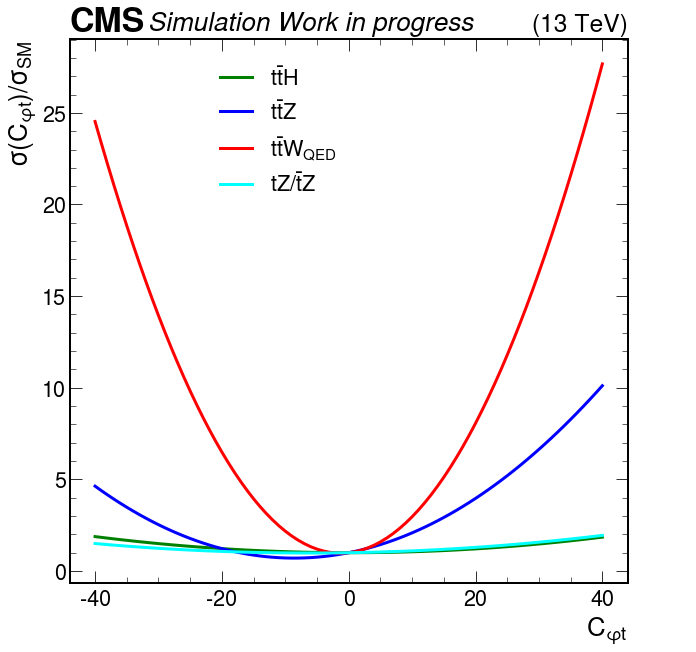

In [32]:
fig, ax = plt.subplots()
hep.cms.label(
    "Work in progress",
    data=False,
    lumi=None,
    loc=0,
    ax=ax,
)



plt.plot(cpt, ttH_cpt_vals, label=r'$t\bar{t}H$', c='green', linewidth=3)
plt.plot(cpt, ttZ_cpt_vals, label=r'$t\bar{t}Z$', c='blue', linewidth=3)
plt.plot(cpt, ttW_cpt_vals, label=r'$t\bar{t}W_{QED}$', c='red', linewidth=3)
plt.plot(cpt, tZq_cpt_vals, label=r'$tZ/\bar{t}Z$', c='cyan', linewidth=3)


ax.set_xlabel(r'$C_{\varphi t}$')
ax.set_ylabel(r'$\sigma(C_{\varphi t})/\sigma_{SM}$')

plt.legend(
        loc='upper center',
        bbox_to_anchor=(0.23, 0.88, 0.90, .11),
        mode="expand",
)

plt.show()

fig.savefig(f'/home/users/dspitzba/public_html/tW_scattering/cpt_scaling_all.png')
fig.savefig(f'/home/users/dspitzba/public_html/tW_scattering/cpt_scaling_all.pdf')


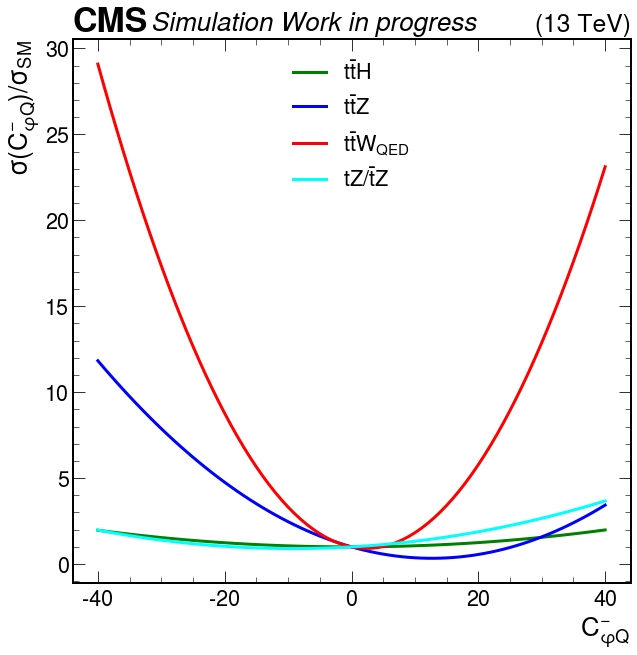

In [33]:
fig, ax = plt.subplots()
hep.cms.label(
    "Work in progress",
    data=False,
    lumi=None,
    loc=0,
    ax=ax,
)



plt.plot(cpt, ttH_cpqm_vals, label=r'$t\bar{t}H$', c='green', linewidth=3)
plt.plot(cpt, ttZ_cpqm_vals, label=r'$t\bar{t}Z$', c='blue', linewidth=3)
plt.plot(cpt, ttW_cpqm_vals, label=r'$t\bar{t}W_{QED}$', c='red', linewidth=3)
plt.plot(cpt, tZq_cpqm_vals, label=r'$tZ/\bar{t}Z$', c='cyan', linewidth=3)

ax.set_xlabel(r'$C_{\varphi Q}^{-}$')
ax.set_ylabel(r'$\sigma(C_{\varphi Q}^{-})/\sigma_{SM}$')

plt.legend()

plt.show()

fig.savefig(f'/home/users/dspitzba/public_html/tW_scattering/cpqm_scaling_all.png')
fig.savefig(f'/home/users/dspitzba/public_html/tW_scattering/cpqm_scaling_all.pdf')


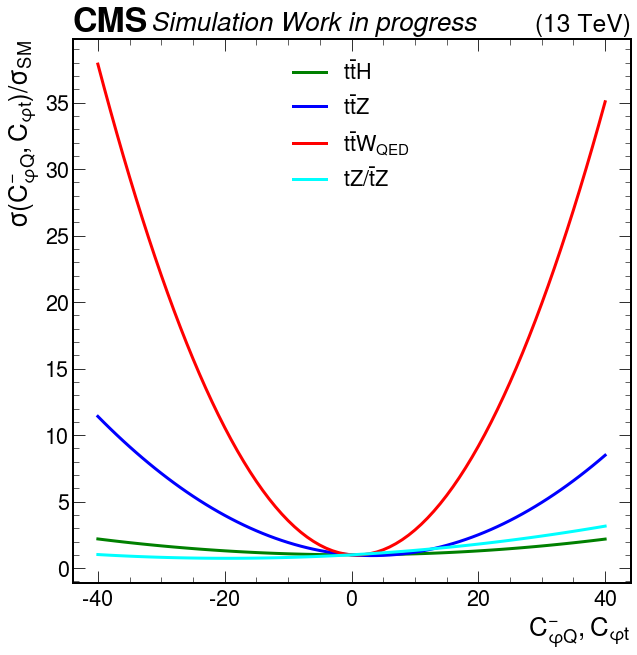

In [34]:
fig, ax = plt.subplots()
hep.cms.label(
    "Work in progress",
    data=False,
    lumi=None,
    loc=0,
    ax=ax,
)



plt.plot(cpt, ttH_corr_vals, label=r'$t\bar{t}H$', c='green', linewidth=3)
plt.plot(cpt, ttZ_corr_vals, label=r'$t\bar{t}Z$', c='blue', linewidth=3)
plt.plot(cpt, ttW_corr_vals, label=r'$t\bar{t}W_{QED}$', c='red', linewidth=3)
plt.plot(cpt, tZq_corr_vals, label=r'$tZ/\bar{t}Z$', c='cyan', linewidth=3)

ax.set_xlabel(r'$C_{\varphi Q}^{-}, C_{\varphi t}$')
ax.set_ylabel(r'$\sigma(C_{\varphi Q}^{-}, C_{\varphi t})/\sigma_{SM}$')

plt.legend()

plt.show()

fig.savefig(f'/home/users/dspitzba/public_html/tW_scattering/corr_scaling_all.png')
fig.savefig(f'/home/users/dspitzba/public_html/tW_scattering/corr_scaling_all.pdf')


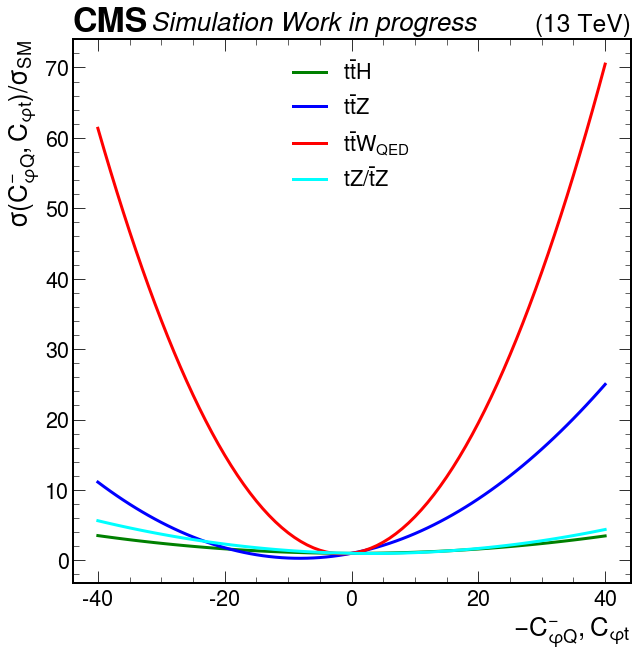

In [35]:
fig, ax = plt.subplots()
hep.cms.label(
    "Work in progress",
    data=False,
    lumi=None,
    loc=0,
    ax=ax,
)



plt.plot(cpt, ttH_acorr_vals, label=r'$t\bar{t}H$', c='green', linewidth=3)
plt.plot(cpt, ttZ_acorr_vals, label=r'$t\bar{t}Z$', c='blue', linewidth=3)
plt.plot(cpt, ttW_acorr_vals, label=r'$t\bar{t}W_{QED}$', c='red', linewidth=3)
plt.plot(cpt, tZq_acorr_vals, label=r'$tZ/\bar{t}Z$', c='cyan', linewidth=3)

ax.set_xlabel(r'$-C_{\varphi Q}^{-}, C_{\varphi t}$')
ax.set_ylabel(r'$\sigma(C_{\varphi Q}^{-}, C_{\varphi t})/\sigma_{SM}$')

plt.legend()

plt.show()

fig.savefig(f'/home/users/dspitzba/public_html/tW_scattering/acorr_scaling_all.png')
fig.savefig(f'/home/users/dspitzba/public_html/tW_scattering/acorr_scaling_all.pdf')